# Load packages and libraries

In [1]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_QC/lib/R/library"))
.libPaths()
# sessionInfo()

Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_QC/bin/python")
library(reticulate)
reticulate::use_python("/home/manuel.tardaguila/conda_envs/multiome_QC/bin/python")
reticulate::use_condaenv("/home/manuel.tardaguila/conda_envs/multiome_QC")
reticulate::py_module_available(module='leidenalg')
reticulate::import('leidenalg')
suppressMessages(library("optparse"))
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(data.table))
suppressMessages(library(ggpubr))
suppressMessages(library(ggplot2))
suppressMessages(library(scDblFinder))
suppressMessages(library("tidyr"))
suppressMessages(library("tibble"))
suppressMessages(library("biovizBase"))
suppressMessages(library("patchwork"))
suppressMessages(library(glmGamPoi))


[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_QC/lib/R/library"

[1] TRUE

Module(leidenalg)

Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”
Warning message:
"package 'scDblFinder' was built under R version 4.3.2"
Warning message:
"package 'SingleCellExperiment' was built under R version 4.3.2"
Warning message:
"package 'SummarizedExperiment' was built under R version 4.3.2"
Warning message:
"package 'MatrixGenerics' was built under R version 4.3.2"
Warning message:
"package 'patchwork' was built under R version 4.3.3"
Warning message:
"package 'glmGamPoi' was built 

# Read the merged object and add the genotypes from all the samples

## Read the file with the genotypes and filter by minimum number of UMIs supporting the genotyped Bc

In [2]:
Uniquely_genotyped_larry_barcodes_assignments<-readRDS("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/deconvolute_LARRY/count_and_filter/Uniquely_genotyped_larry_barcodes_assignments.rds")

In [3]:
cat("Uniquely_genotyped_larry_barcodes_assignments_0\n")
  cat(str(Uniquely_genotyped_larry_barcodes_assignments))
  cat("\n")

Uniquely_genotyped_larry_barcodes_assignments_0
'data.frame':	157998 obs. of  5 variables:
 $ sample           : Ord.factor w/ 4 levels "MCO_01326"<"MCO_01327"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ CellBC           : chr  "CB:Z:AAACAGCCAATGCGCT-1" "CB:Z:AAACCGAAGTCACCAG-1" "CB:Z:AAACGGATCGGCTATG-1" "CB:Z:AAAGGACGTGCGCATG-1" ...
 $ GFPbc            : Ord.factor w/ 13 levels "chrGFP_WTA"<"chrGFP_WTB"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ GFPbc_attribution: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Number_of_UMIS   : int  1 1 1 1 1 1 1 1 1 1 ...



In [4]:
Threshold_UMIS_per_cell = 1

In [5]:
Uniquely_genotyped_larry_barcodes_assignments_FILTERED<-Uniquely_genotyped_larry_barcodes_assignments[which(Uniquely_genotyped_larry_barcodes_assignments$Number_of_UMIS >= Threshold_UMIS_per_cell),]

In [6]:
cat("Uniquely_genotyped_larry_barcodes_assignments_FILTERED\n")
  cat(str(Uniquely_genotyped_larry_barcodes_assignments_FILTERED))
  cat("\n")

Uniquely_genotyped_larry_barcodes_assignments_FILTERED
'data.frame':	157998 obs. of  5 variables:
 $ sample           : Ord.factor w/ 4 levels "MCO_01326"<"MCO_01327"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ CellBC           : chr  "CB:Z:AAACAGCCAATGCGCT-1" "CB:Z:AAACCGAAGTCACCAG-1" "CB:Z:AAACGGATCGGCTATG-1" "CB:Z:AAAGGACGTGCGCATG-1" ...
 $ GFPbc            : Ord.factor w/ 13 levels "chrGFP_WTA"<"chrGFP_WTB"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ GFPbc_attribution: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Number_of_UMIS   : int  1 1 1 1 1 1 1 1 1 1 ...



In [7]:
Uniquely_genotyped_larry_barcodes_assignments_FILTERED$Sample_CellBC_adapted<-paste(Uniquely_genotyped_larry_barcodes_assignments_FILTERED$sample,
                                                                                    gsub("^[^:]+:[^:]+:","",Uniquely_genotyped_larry_barcodes_assignments_FILTERED$CellBC), sep='_')

cat("Uniquely_genotyped_larry_barcodes_assignments_sel_FILTERED_1\n")
cat(str(Uniquely_genotyped_larry_barcodes_assignments_FILTERED))
cat("\n")

Uniquely_genotyped_larry_barcodes_assignments_sel_FILTERED_1
'data.frame':	157998 obs. of  6 variables:
 $ sample               : Ord.factor w/ 4 levels "MCO_01326"<"MCO_01327"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ CellBC               : chr  "CB:Z:AAACAGCCAATGCGCT-1" "CB:Z:AAACCGAAGTCACCAG-1" "CB:Z:AAACGGATCGGCTATG-1" "CB:Z:AAAGGACGTGCGCATG-1" ...
 $ GFPbc                : Ord.factor w/ 13 levels "chrGFP_WTA"<"chrGFP_WTB"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ GFPbc_attribution    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Number_of_UMIS       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Sample_CellBC_adapted: chr  "MCO_01326_AAACAGCCAATGCGCT-1" "MCO_01326_AAACCGAAGTCACCAG-1" "MCO_01326_AAACGGATCGGCTATG-1" "MCO_01326_AAAGGACGTGCGCATG-1" ...



## Read the merged_unprocessed object

In [8]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/")

In [9]:
adata<-readRDS(file="merged_unprocessed.rds")

## Check initial metadata

In [10]:
metadata<-adata[[]]

In [11]:
cat("metadata_0\n")
cat(str(metadata))
cat("\n")
cat(str(row.names(metadata)))
cat("\n")


metadata_0
'data.frame':	39735 obs. of  61 variables:
 $ orig.ident                       : chr  "MCO_01326" "MCO_01326" "MCO_01326" "MCO_01326" ...
 $ nCount_RNA                       : num  10351 9507 23590 16700 9684 ...
 $ nFeature_RNA                     : int  4753 4435 7082 5881 4688 4112 4336 5578 6960 7031 ...
 $ percent.mt                       : num  0.473 0.337 0.165 1.485 0.434 ...
 $ nCount_RNA_raw                   : num  11643 10909 24492 17664 11274 ...
 $ nFeature_RNA_raw                 : int  4772 4612 7084 5921 4715 4434 4383 5582 6963 7032 ...
 $ nCount_ATAC                      : num  29946 90488 71936 50024 54272 ...
 $ nFeature_ATAC                    : int  7431 20806 16684 12087 12915 5012 15158 18007 9850 31543 ...
 $ gex_raw_reads                    : int  23298 21771 47400 31849 21620 20973 19452 29421 48530 46234 ...
 $ gex_mapped_reads                 : int  22654 21165 46078 31152 20952 20394 18917 28598 47182 44973 ...
 $ gex_conf_intergenic_reads     

In [12]:
summary(as.factor(metadata$Assigned_GFPbc))

chrGFP_R882H1    chrGFP_R882H2    chrGFP_R882H3 chrGFP_rs_R882H1 
             182               12              196              334 
chrGFP_rs_R882H2 chrGFP_rs_R882H3       chrGFP_rs1       chrGFP_rs2 
             111              119              185              177 
      chrGFP_rs3       chrGFP_WTA       chrGFP_WTB       chrGFP_WTC 
            2196               19               35               52 
            NA's 
           36117

## Add the genotype data

In [13]:
### Add GFPbc_attribution

gfp1      = setNames(Uniquely_genotyped_larry_barcodes_assignments_FILTERED$GFPbc_attribution, 
                     Uniquely_genotyped_larry_barcodes_assignments_FILTERED$Sample_CellBC_adapted)

cat("gfp1_0\n")
cat(str(gfp1))
cat("\n")


adata@meta.data$No_assigned_GFPbc = gfp1[rownames(adata@meta.data)]

### Add GFPbc

gfp2      = setNames(as.character(Uniquely_genotyped_larry_barcodes_assignments_FILTERED$GFPbc), 
                     Uniquely_genotyped_larry_barcodes_assignments_FILTERED$Sample_CellBC_adapted)

cat("gfp2_0\n")
cat(str(gfp2))
cat("\n")


adata@meta.data$Assigned_GFPbc = gfp2[rownames(adata@meta.data)]


metadata_adata<-adata[[]]

cat("metadata_adata_REDEFINED_AFTER_GFPbc_assignation\n")
cat(str(metadata_adata))
cat("\n")


adata@meta.data$Assigned_GFPgenotype<-NA

adata@meta.data$Assigned_GFPgenotype[which(adata@meta.data$Assigned_GFPbc%in%c("chrGFP_WTA","chrGFP_WTB","chrGFP_WTC"))]<-'WT'
adata@meta.data$Assigned_GFPgenotype[which(adata@meta.data$Assigned_GFPbc%in%c("chrGFP_rs1","chrGFP_rs2","chrGFP_rs3"))]<-'rsCHEK2'
adata@meta.data$Assigned_GFPgenotype[which(adata@meta.data$Assigned_GFPbc%in%c("chrGFP_R882H1","chrGFP_R882H2","chrGFP_R882H3"))]<-'R882H'
adata@meta.data$Assigned_GFPgenotype[which(adata@meta.data$Assigned_GFPbc%in%c("chrGFP_rs_R882H1","chrGFP_rs_R882H2","chrGFP_rs_R882H3"))]<-'Double_mutants'

metadata_adata<-adata[[]]

cat("metadata_adata_REDEFINED_AFTER_Assigned_GFPgenotype_assignation\n")
cat(str(metadata_adata))
cat("\n")

adata@meta.data$Assigned_GFPbc<-factor(adata@meta.data$Assigned_GFPbc,
                                       levels = c("chrGFP_WTA","chrGFP_WTB","chrGFP_WTC",
                                                  "chrGFP_rs1","chrGFP_rs2","chrGFP_rs3",
                                                  "chrGFP_R882H1","chrGFP_R882H2","chrGFP_R882H3",
                                                  "chrGFP_rs_R882H1","chrGFP_rs_R882H2","chrGFP_rs_R882H3","No_GFPbcs"),
                                       ordered=T)



adata@meta.data$Assigned_GFPgenotype<-factor(adata@meta.data$Assigned_GFPgenotype,
                                             levels = c("WT","rsCHEK2","R882H","Double_mutants"),
                                             ordered=T)


metadata_adata<-adata[[]]

cat("metadata_adata_REDEFINED_FINAL\n")
cat(str(metadata_adata))
cat("\n")

gfp1_0
 Named int [1:157998] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "names")= chr [1:157998] "MCO_01326_AAACAGCCAATGCGCT-1" "MCO_01326_AAACCGAAGTCACCAG-1" "MCO_01326_AAACGGATCGGCTATG-1" "MCO_01326_AAAGGACGTGCGCATG-1" ...

gfp2_0
 Named chr [1:157998] "chrGFP_WTA" "chrGFP_WTA" "chrGFP_WTA" "chrGFP_WTA" ...
 - attr(*, "names")= chr [1:157998] "MCO_01326_AAACAGCCAATGCGCT-1" "MCO_01326_AAACCGAAGTCACCAG-1" "MCO_01326_AAACGGATCGGCTATG-1" "MCO_01326_AAAGGACGTGCGCATG-1" ...

metadata_adata_REDEFINED_AFTER_GFPbc_assignation
'data.frame':	39735 obs. of  61 variables:
 $ orig.ident                       : chr  "MCO_01326" "MCO_01326" "MCO_01326" "MCO_01326" ...
 $ nCount_RNA                       : num  10351 9507 23590 16700 9684 ...
 $ nFeature_RNA                     : int  4753 4435 7082 5881 4688 4112 4336 5578 6960 7031 ...
 $ percent.mt                       : num  0.473 0.337 0.165 1.485 0.434 ...
 $ nCount_RNA_raw                   : num  11643 10909 24492 17664 11274 ...
 $ nFeature_RNA_raw

In [14]:
summary(adata@meta.data$Assigned_GFPbc)

chrGFP_WTA       chrGFP_WTB       chrGFP_WTC       chrGFP_rs1 
              52              103              123              383 
      chrGFP_rs2       chrGFP_rs3    chrGFP_R882H1    chrGFP_R882H2 
             357             2942              466               66 
   chrGFP_R882H3 chrGFP_rs_R882H1 chrGFP_rs_R882H2 chrGFP_rs_R882H3 
             470              630              275              279 
       No_GFPbcs             NA's 
              32            33557

In [15]:
summary(adata@meta.data$Assigned_GFPgenotype)

WT        rsCHEK2          R882H Double_mutants           NA's 
           278           3682           1002           1184          33589

# Make sure all windows of ATAC peaks are represented

In [16]:
adata

An object of class Seurat 
667165 features across 39735 samples within 4 assays 
Active assay: RNA (36601 features, 0 variable features)
 1 layer present: counts
 3 other assays present: RNA_raw, SCT, ATAC

In [17]:
atacm = GetAssayData(adata, layer = "counts", assay = "ATAC")


In [18]:
dim(atacm)

[1] 563323  39735

In [19]:
samples        = c("MCO_01326","MCO_01327", "MCO_01328","MCO_01329")

processing_outputs_dir<-"/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/"


In [20]:
Windows    = c()
for (samp in samples){
sample_dir = sprintf("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/%s/", samp)
wind       = readLines(paste0(sample_dir, "snATAC_matrices/", samp, "_snATAC_pipeline_job.regions"))
   Windows = c(Windows, wind)
    }

In [21]:
length(Windows)
length(unique(Windows))

[1] 2250361

[1] 563323

# Make a list of the genes corrected by CellBender

In [22]:
##### Make a list of genes that were corrected by CellBender (QC purposes)
celb_mat    = GetAssayData(adata, layer = "counts", assay = "RNA")
raw_mat     = GetAssayData(adata, layer = "counts", assay = "RNA_raw")
fract       = celb_mat/raw_mat
means       = rowMeans(fract, na.rm=T)
sorted_list = 1-sort(means)


Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 10.8 GiB"
Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 10.8 GiB"


In [23]:
cat("fract\n")
cat(str(fract))
cat("\n")

fract
Formal class 'dgeMatrix' [package "Matrix"] with 4 slots
  ..@ Dim     : int [1:2] 36601 39735
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. ..$ : chr [1:39735] "MCO_01326_AAACAGCCACAGCCAT-1" "MCO_01326_AAACAGCCACCAGGTT-1" "MCO_01326_AAACAGCCACGGTACT-1" "MCO_01326_AAACAGCCAGCCGCTA-1" ...
  ..@ x       : num [1:1454340735] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
  ..@ factors : list()



In [24]:
cat("means\n")
cat(str(means))
cat("\n")

means
 Named num [1:36601] 1 NaN 1 0.983 1 ...
 - attr(*, "names")= chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...



In [25]:
cat("sorted_list_CELL_BENDER_list\n")
cat(str(sorted_list))
cat("\n")

sorted_list_CELL_BENDER_list
 Named num [1:34109] 0.818 0.731 0.717 0.715 0.706 ...
 - attr(*, "names")= chr [1:34109] "AC092490.2" "FAM25G" "POTEG" "AC023469.1" ...



In [26]:
summary(sorted_list)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.01856 0.03006 0.03821 0.81818 

In [27]:
Genes_corrected_more_than_0.25<-sorted_list[which(sorted_list >= 0.25)]

In [28]:
cat("Genes_corrected_more_than_0.25\n")
cat(str(Genes_corrected_more_than_0.25))
cat("\n")
summary(Genes_corrected_more_than_0.25)

Genes_corrected_more_than_0.25
 Named num [1:216] 0.818 0.731 0.717 0.715 0.706 ...
 - attr(*, "names")= chr [1:216] "AC092490.2" "FAM25G" "POTEG" "AC023469.1" ...



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2500  0.2689  0.2944  0.3259  0.3314  0.8182 

In [29]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/")
write.csv(data.frame(avg_fraction_removed = sorted_list),"Cellbender_genes.csv")

# Filter doublets called by both amulet and scDB adata2

In [30]:
adata@meta.data$doublet= with(adata@meta.data, doublet_amulet == TRUE & 
                               scDblFinder.class_atac=="doublet" & scDblFinder.class=="doublet")

In [31]:
adata2<-subset(adata, doublet == FALSE)

In [32]:
metadata<-adata2[[]]

In [33]:
dim(metadata)

[1] 38007    62

In [34]:
summary(adata2@meta.data$Assigned_GFPbc)

chrGFP_WTA       chrGFP_WTB       chrGFP_WTC       chrGFP_rs1 
              52              103              123              381 
      chrGFP_rs2       chrGFP_rs3    chrGFP_R882H1    chrGFP_R882H2 
             356             2908              465               66 
   chrGFP_R882H3 chrGFP_rs_R882H1 chrGFP_rs_R882H2 chrGFP_rs_R882H3 
             470              627              275              278 
       No_GFPbcs             NA's 
              32            31871

In [35]:
summary(adata2@meta.data$Assigned_GFPgenotype)

WT        rsCHEK2          R882H Double_mutants           NA's 
           278           3645           1001           1180          31903

In [36]:
table(adata2@meta.data$orig.ident,adata2@meta.data$Assigned_GFPgenotype)

           
              WT rsCHEK2 R882H Double_mutants
  MCO_01326  139     266   871            707
  MCO_01327    9      17    18              6
  MCO_01328   36     690    26            182
  MCO_01329   94    2672    86            285

In [37]:
table(adata2@meta.data$orig.ident,adata2@meta.data$Assigned_GFPbc)

           
            chrGFP_WTA chrGFP_WTB chrGFP_WTC chrGFP_rs1 chrGFP_rs2 chrGFP_rs3
  MCO_01326         24         68         47         51         66        149
  MCO_01327          1          7          1          5          0         12
  MCO_01328         11          4         21         72         69        549
  MCO_01329         16         24         54        253        221       2198
           
            chrGFP_R882H1 chrGFP_R882H2 chrGFP_R882H3 chrGFP_rs_R882H1
  MCO_01326           375            56           440              249
  MCO_01327            11             2             5                4
  MCO_01328            14             2            10              144
  MCO_01329            65             6            15              230
           
            chrGFP_rs_R882H2 chrGFP_rs_R882H3 No_GFPbcs
  MCO_01326              226              232        22
  MCO_01327                2                0         0
  MCO_01328               20               18      

# RMV cells with 0 counts after CellBender correction

In [38]:
adata2 <- adata2[, unname(which( colSums(GetAssayData(adata2, slot = "counts", assay = "RNA"))!=0))]


Warning message:
"The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead."


In [39]:
metadata<-adata2[[]]

In [40]:
dim(metadata)

[1] 38007    62

# Save first filtered object

In [41]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/")
saveRDS(adata2, file="merged_unprocessed_db_filt.rds")


# Pickup from checkpoint 1

In [2]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/")
adata2<-readRDS(file="merged_unprocessed_db_filt.rds")

# Cluster without integration and check if any cluster looks specially bad for QC metrics

## RNA modality

In [3]:
DefaultAssay(adata2) <- 'RNA'
adata2
adata2 <- SCTransform(adata2, verbose = FALSE) 
adata2 <- RunPCA(adata2) 
adata2 <- RunUMAP(adata2, dims=1:50, reduction.name='umap.rna', reduction.key='rnaUMAP_')

An object of class Seurat 
667165 features across 38007 samples within 4 assays 
Active assay: RNA (36601 features, 0 variable features)
 1 layer present: counts
 3 other assays present: RNA_raw, SCT, ATAC

Warning message:
"Different cells and/or features from existing assay SCT"
PC_ 1 
Positive:  GRID2, KIAA0825, UNC5D, CADM2, ROR1, L1TD1, PTPRG, SNHG14, AC073050.1, RIMS2 
	   HS3ST5, GULP1, ANK2, FRAS1, LARGE1, TENM3, CASC15, AC022140.1, NLGN4X, SYT1 
	   ADCY2, DLGAP1, GPC6, TRPM3, VCAN, RBPMS, TMEM132D, RBFOX1, KCND2, PTPRZ1 
Negative:  PPBP, PF4, THBS1, LTBP1, LINC02694, NEAT1, F13A1, PDE3A, DGKI, RAB27B 
	   AL603840.1, PLEK, ARHGAP6, DNM3, AC004053.1, HBG2, AC109466.1, TMSB4X, ITGB3, RGS6 
	   GP1BB, RAP1B, AC013652.1, MMRN1, ANGPT1, ITGA2B, LINC02284, SLC24A3, MEIS1, COL24A1 
PC_ 2 
Positive:  HBZ, HBG2, RELN, LRRC7, SLC25A37, XACT, HBG1, HBA1, SLC4A1, ITGA4 
	   WNT5B, CD36, GYPB, PRG2, HBA2, GYPA, HBE1, TFRC, PTH2R, AHSP 
	   ANK1, ALAS2, ALDH1A1, STXBP5, BLVRB, PTMA, S100A4, KCNQ5, HPSE2, ZNF804A 
Negative:  GRID2, PPBP, PF4, THBS1, KIAA0825, LTBP1, LINC02694, F13A1, UNC5D, DNM3 
	   AL603840.1, DGKI, AC004053.1, CADM2, PDE3A, ROR1, PLEK, L1TD1, AC073050.1, HS3ST5 
	   AC10946

## ATAC modality

In [4]:
DefaultAssay(adata2) <- 'ATAC'
adata2
adata2 <- RunTFIDF(adata2)
adata2 <- FindTopFeatures(adata2, min.cutoff='q0')
adata2 <- RunSVD(adata2)
adata2 <- RunUMAP(adata2, reduction='lsi', dims=2:50, reduction.name='umap.atac', reduction.key='atacUMAP_')

An object of class Seurat 
668045 features across 38007 samples within 4 assays 
Active assay: ATAC (563323 features, 0 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, RNA_raw, SCT
 2 dimensional reductions calculated: pca, umap.rna

Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, slot = "counts"), :
"Some features contain 0 total counts"
Running SVD

Scaling cell embeddings

17:03:15 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

17:03:15 Read 38007 rows and found 49 numeric columns

17:03:15 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

17:03:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:03:18 Writing NN index file to temp file /localscratch/17671272.manuel.tardaguila/RtmpIMnNjL/file3db2141185c043


## WNN to combine RNA and ATAC

In [5]:
adata2 <- FindMultiModalNeighbors(adata2, reduction.list=list('pca', 'lsi'), dims.list=list(1:50, 2:50))
adata2 <- RunUMAP(adata2, nn.name='weighted.nn', reduction.name='umap.wnn', reduction.key='wnnUMAP_')
adata2 <- FindClusters(adata2, graph.name='wsnn', algorithm=4, resolution = 2, verbose=FALSE, method = "igraph")

Calculating cell-specific modality weights

Finding 20 nearest neighbors for each modality.

Calculating kernel bandwidths

Finding multimodal neighbors

Constructing multimodal KNN graph

Constructing multimodal SNN graph

17:06:19 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

17:06:21 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 20

17:06:24 Initializing from normalized Laplacian + noise (using RSpectra)

17:06:25 Commencing optimization for 200 epochs, with 1163068 positive edges

17:06:43 Optimization finished

Warning message in paste(el[, 1], el[, 2], sep = "|"):
"NAs introduced by coercion to integer range"
Warning message in paste(el[, 1], el[, 2], sep = "|"):
"NAs introduced by coercion to integer range"
Warning message in deparse(substitute(arg)):
"NAs introduced by coercion to integer range"
Warning message in paste0("ig

# Save second clustered filtered object 

In [6]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/")
saveRDS(adata2, file="merged_unprocessed_db_filt_clustered.rds")

# Pickup from checkpoint 2

In [2]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/")
adata2<-readRDS(file="merged_unprocessed_db_filt_clustered.rds")

# Graphs of clusterization

In [7]:
 path_graphs = paste("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/",'graphs','/',sep='')
  
  if (file.exists(path_graphs)){
    
    
  }else{
    
    dir.create(file.path(path_graphs))
    
  }#path_processing_outputs

## Graph WNN by SampleID

png 
  2

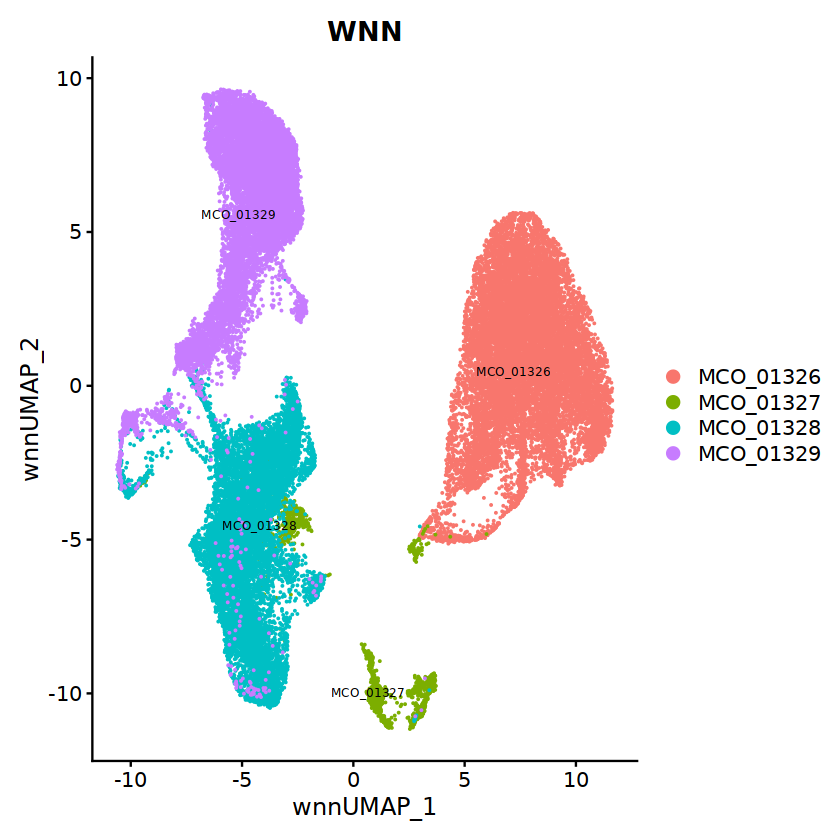

In [11]:
p3 <- DimPlot(adata2, reduction = "umap.wnn", group.by = "orig.ident", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='WNN_by_SampleID.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

## Graph WNN by Seurat cluster

png 
  2

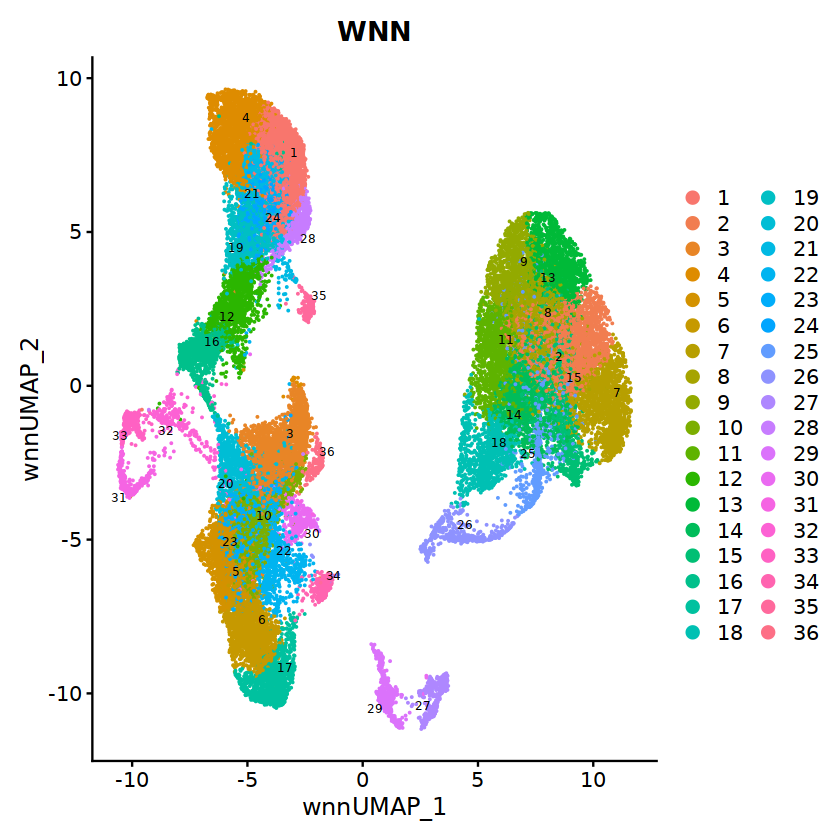

In [12]:
p3 <- DimPlot(adata2, reduction = "umap.wnn", group.by = "seurat_clusters", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='WNN_by_Seurat_cluster.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

## Graph WNN by GFPbc

In [32]:
metadata<-adata2[[]]

colnames(metadata)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "percent.mt"                       
 [5] "nCount_RNA_raw"                    "nFeature_RNA_raw"                 
 [7] "nCount_ATAC"                       "nFeature_ATAC"                    
 [9] "gex_raw_reads"                     "gex_mapped_reads"                 
[11] "gex_conf_intergenic_reads"         "gex_conf_exonic_reads"            
[13] "gex_conf_intronic_reads"           "gex_conf_exonic_unique_reads"     
[15] "gex_conf_exonic_antisense_reads"   "gex_conf_exonic_dup_reads"        
[17] "gex_exonic_umis"                   "gex_conf_intronic_unique_reads"   
[19] "gex_conf_intronic_antisense_reads" "gex_conf_intronic_dup_reads"      
[21] "gex_intronic_umis"                 "gex_conf_txomic_unique_reads"     
[23] "gex_umis_count"                    "gex_genes_count"                  
[25] "atac_raw_reads"                    "atac_unmapped_reads"              
[27] "atac_lowmapq"                      "atac_dup_reads"                   
[29] "atac_chimeric_reads"               "atac_mitochondrial_reads"         
[31] "atac_fragments"                    "atac_TSS_fragments"               
[33] "atac_peak_region_fragments"        "atac_peak_region_cutsites"        
[35] "TSS.enrichment"                    "TSS.percentile"                   
[37] "scDblFinder.class"                 "scDblFinder.score"                
[39] "scDblFinder.weighted"              "scDblFinder.cxds_score"           
[41] "scDblFinder.class_atac"            "scDblFinder.score_atac"           
[43] "scDblFinder.weighted_atac"         "scDblFinder.cxds_score_atac"      
[45] "No_assigned_GFPbc"                 "Assigned_GFPbc"                   
[47] "Assigned_GFPgenotype"              "DBL_comb"                         
[49] "amulet_nFrags"                     "amulet_uniqFrags"                 
[51] "amulet_nAbove2"                    "amulet_total.nAbove2"             
[53] "amulet_p.value"                    "amulet_q.value"                   
[55] "doublet_amulet"                    "nCount_SCT"                       
[57] "nFeature_SCT"                      "SCT.weight"                       
[59] "ATAC.weight"                       "wsnn_res.0.2"                     
[61] "seurat_clusters"                   "doublet"                          
[63] "wsnn_res.2"

Warning message:
"Removed 31871 rows containing missing values (`geom_point()`)."
Warning message:
"ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"Removed 31871 rows containing missing values (`geom_point()`)."
Warning message:
"ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


png 
  2

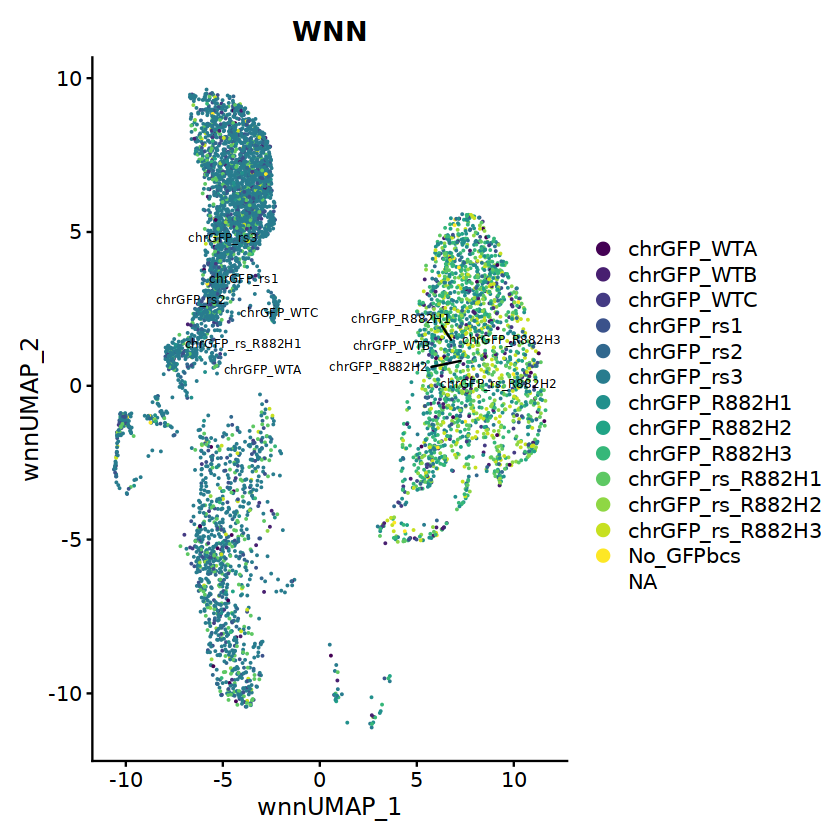

In [33]:
p3 <- DimPlot(adata2, reduction = "umap.wnn", group.by = "Assigned_GFPbc", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='WNN_by_Assigned_GFPbc.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

## Graph WNN by genotype

p3 <- DimPlot(adata2, reduction = "umap.wnn", group.by = "Assigned_GFPgenotype", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='WNN_by_Assigned_GFPgenotype.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

## Graph WNN_Intermediate_QC_metrics

png 
  2

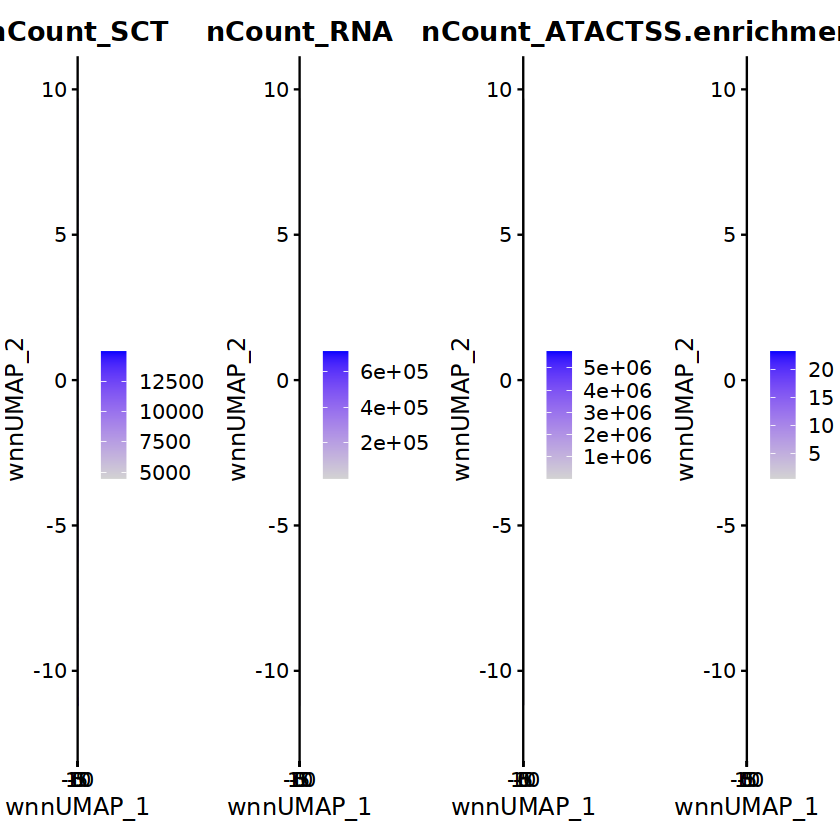

In [16]:
p6 <- FeaturePlot(adata2, features = c("nCount_SCT", "nCount_RNA", "nCount_ATAC",'TSS.enrichment'), ncol = 4,
                  reduction = 'umap.wnn')

p6

setwd(path_graphs)
png(file='WNN_Intermediate_QC_metrics.png', width =1000, height = 500)
p6
dev.off()

png 
  2

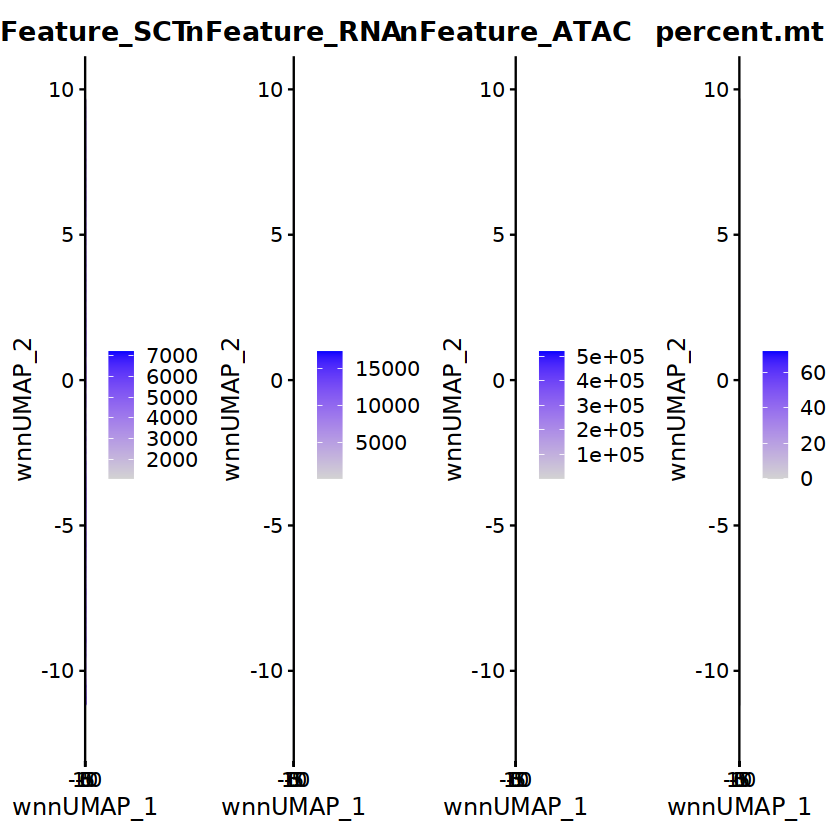

In [17]:
p6 <- FeaturePlot(adata2, features = c("nFeature_SCT", "nFeature_RNA", "nFeature_ATAC",'percent.mt'), ncol = 4,
                  reduction = 'umap.wnn')

p6

setwd(path_graphs)
png(file='WNN_Intermediate_QC_metrics_2.png', width =1000, height = 500)
p6
dev.off()

## Graph WNN by marker genes

png 
  2

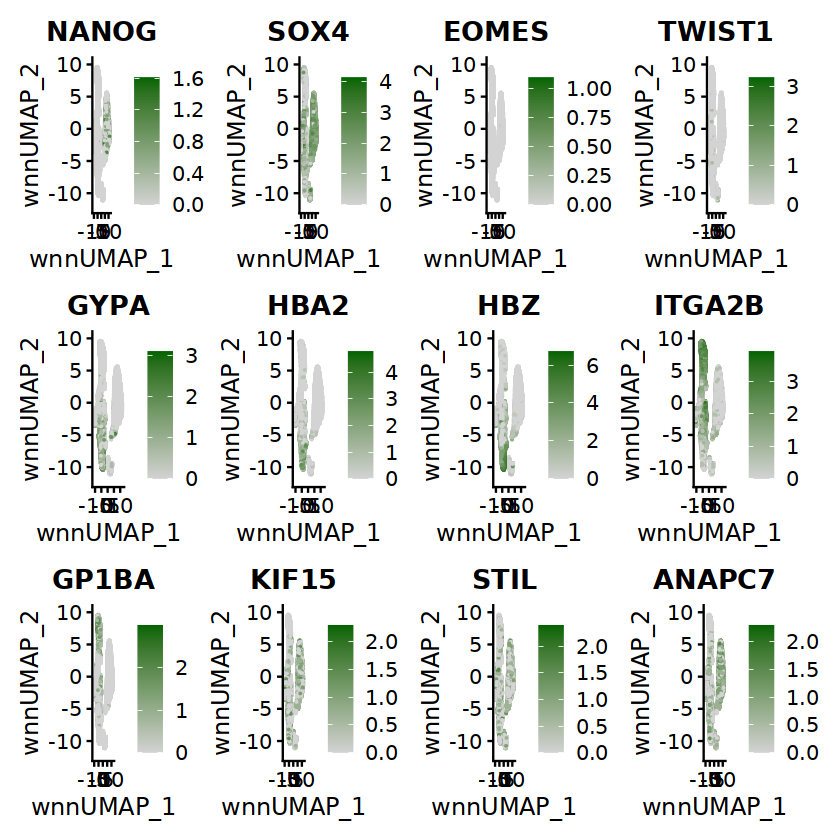

In [20]:
DefaultAssay(adata2) <- 'SCT'


p5 <- FeaturePlot(adata2, features = c("NANOG",'SOX4', 'EOMES', 'TWIST1'),
                  reduction = 'umap.wnn', 
                  cols = c("lightgrey","darkgreen"), ncol = 4)
p5_1 <- FeaturePlot(adata2, features = c('GYPA','HBA2','HBZ','ITGA2B'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 4)
p5_2 <- FeaturePlot(adata2, features = c('GP1BA','KIF15','STIL','ANAPC7'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 4)
 p5 / p5_1 /p5_2

setwd(path_graphs)
png(file='WNN_marker_genes.png', width =1000, height = 500)
p5 / p5_1 /p5_2
dev.off()

# Violin graphs to decide if a cluster is lowQuality

## Percent.mt

png 
  2

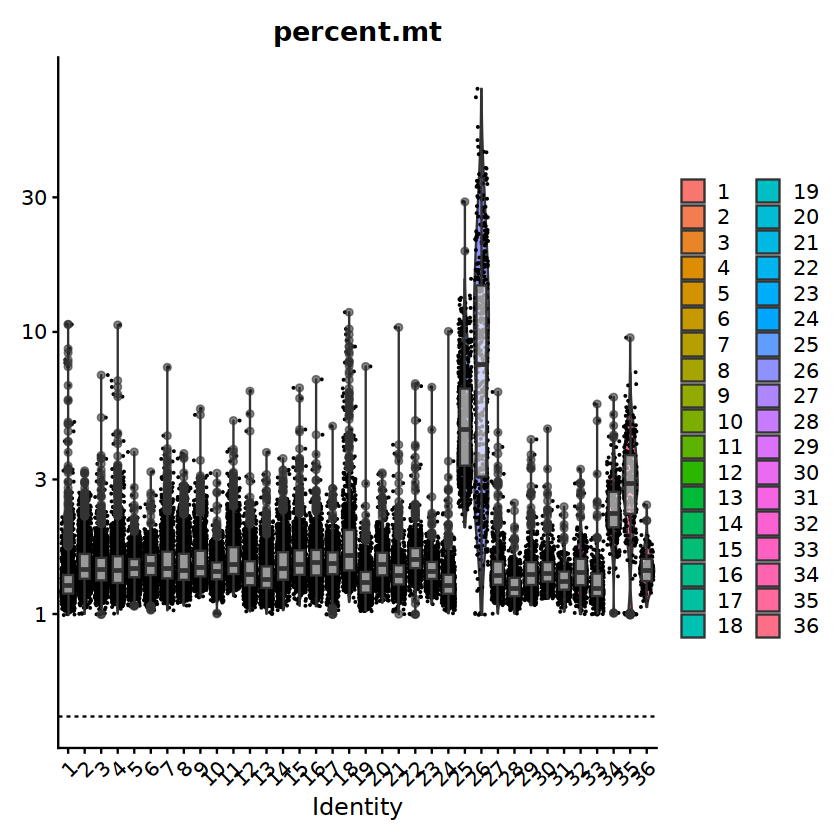

In [21]:
p10 <- VlnPlot(adata2, features='percent.mt', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata2$percent.mt), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_percent.mt.png', width =1000, height = 500)
p10
dev.off()

## nCount_SCT

In [22]:
p10 <- VlnPlot(adata2, features='nCount_SCT', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata2$nCount_SCT), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nCount_SCT.png', width =1000, height = 500)
p10
dev.off()

png 
  2

## nFeature_SCT

In [23]:
p10 <- VlnPlot(adata2, features='nFeature_SCT', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata2$nFeature_SCT), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nFeature_SCT.png', width =1000, height = 500)
p10
dev.off()

png 
  2

## nCount_ATAC

In [24]:
p10 <- VlnPlot(adata2, features='nCount_ATAC', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata2$nFeature_ATAC), linetype='dashed')


setwd(path_graphs)
png(file='Vln_nCount_ATAC.png', width =1000, height = 500)
p10
dev.off()



png 
  2

## nFeature_ATAC

In [25]:
####

p10 <- VlnPlot(adata2, features='nFeature_ATAC', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata2$nCount_RNA), linetype='dashed')

setwd(path_graphs)
png(file='Vln_nFeature_ATAC.png', width =1000, height = 500)
p10
dev.off()

png 
  2

## nCount_RNA

In [26]:
####

p10 <- VlnPlot(adata2, features='nCount_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata2$nCount_RNA), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nCount_RNA.png', width =1000, height = 500)
p10
dev.off()

png 
  2

## nFeature_RNA

In [27]:
####

p10 <- VlnPlot(adata2, features='nFeature_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata2$nFeature_RNA), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nFeature_RNA.png', width =1000, height = 500)
p10
dev.off()


png 
  2

## TSS.enrichment

In [28]:
####

p10 <- VlnPlot(adata2, features='TSS.enrichment', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata2$TSS.enrichment), linetype='dashed')



setwd(path_graphs)
png(file='Vln_TSS.enrichment.png', width =1000, height = 500)
p10
dev.off()

png 
  2

## amulet_nFrags

In [29]:
####

p10 <- VlnPlot(adata2, features='amulet_nFrags', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata2$amulet_nFrags), linetype='dashed')



setwd(path_graphs)
png(file='Vln_amulet_nFrags.png', width =1000, height = 500)
p10
dev.off()


png 
  2

## scDblFinder.score

In [30]:
####

p10 <- VlnPlot(adata2, features='scDblFinder.score', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata2$scDblFinder.score), linetype='dashed')



setwd(path_graphs)
png(file='Vln_scDblFinder.score.png', width =1000, height = 500)
p10
dev.off()

png 
  2

## scDblFinder.score_atac

In [31]:
####

p10 <- VlnPlot(adata2, features='scDblFinder.score_atac', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata2$scDblFinder.score_atac), linetype='dashed')



setwd(path_graphs)
png(file='Vln_scDblFinder.score_atac.png', width =1000, height = 500)
p10
dev.off()

png 
  2

# DECISION TO FILTER OUT CLUSTER 26 BASED ON pc.mt

In [3]:
adata3 = subset(adata2, seurat_clusters!=26)


## Call Peaks and make new peak matrix

In [4]:
DefaultAssay(adata3) <- 'ATAC'
peaks <- CallPeaks(
  object = adata3,
  macs2.path = "/group/soranzo/conda_envs/Manuel_macs2/bin/macs2"
)

In [5]:
length(peaks)

[1] 340656

In [6]:
frag.file <- "/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/merged.atac_fragments.tsv.gz"
Fragmobj <- CreateFragmentObject(frag.file,cells =Cells(adata3) )

Computing hash



In [7]:
peakmat = FeatureMatrix(fragments = Fragmobj, features = peaks, cells = Cells(adata3), process_n = 10000,
                        sep = c(":", "-"), verbose = TRUE)

Extracting reads overlapping genomic regions



In [8]:
norm_chr = rownames(peakmat)[stringr::str_split_fixed(rownames(peakmat), "\:",2)[,1] %in% 
                             paste0("chr", c(1:22, "X", "Y"))]

ERROR: Error: '\:' is an unrecognized escape in character string (<text>:1:76)


In [ ]:
peakmat=peakmat[norm_chr,]

In [ ]:
dim(peakmat)

In [ ]:
suppressMessages(annotations <- GetGRangesFromEnsDb(ensdb=EnsDb.Hsapiens.v86))
seqlevelsStyle(annotations)  <- 'UCSC'
genome(annotations)          <- 'hg38'

In [ ]:
suppressWarnings(chrom_assay <- CreateChromatinAssay(counts=peakmat, sep=c(':', '-'), 
                                                     genome='hg38', fragments=Fragmobj, 
                                                     min.cells=-1, min.features=-1, 
                                                     annotation=annotations))



adata3[['ATAC']] <- chrom_assay

# Save third clustered filtered object 

In [ ]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/")
saveRDS(adata3, file="merged_unprocessed_db_filt_clustered_filt_clust26_new_peaks.rds")

# Reclustering

## Recluster RNA modality

In [36]:
rm(adata2)

In [ ]:
DefaultAssay(adata3) <- 'RNA'
adata3
adata3 <- SCTransform(adata3, verbose = FALSE) 
adata3 <- RunPCA(adata3) 
adata3 <- RunUMAP(adata3, dims=1:50, reduction.name='umap.rna', reduction.key='rnaUMAP_')

An object of class Seurat 
668045 features across 37504 samples within 4 assays 
Active assay: RNA (36601 features, 0 variable features)
 1 layer present: counts
 3 other assays present: RNA_raw, SCT, ATAC
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

## Recluster ATAC modality

In [ ]:
DefaultAssay(adata3) <- 'ATAC'
adata3
adata3 <- RunTFIDF(adata3)
adata3 <- FindTopFeatures(adata3, min.cutoff='q0')
adata3 <- RunSVD(adata3)
adata3 <- RunUMAP(adata3, reduction='lsi', dims=2:50, reduction.name='umap.atac', reduction.key='atacUMAP_')


## WNN to combine RNA and ATAC

In [ ]:
adata3 <- FindMultiModalNeighbors(adata3, reduction.list=list('pca', 'lsi'), dims.list=list(1:50, 2:50))
adata3 <- RunUMAP(adata3, nn.name='weighted.nn', reduction.name='umap.wnn', reduction.key='wnnUMAP_')
adata3 <- FindClusters(adata3, graph.name='wsnn', algorithm=4, resolution = 0.5, verbose=FALSE, method = "igraph")